## Welcome to the exercise compilation for the module "Probabilistic Design Methods and Structural Safety"

### 1. Introduction to Python and the Jupyter Notebook

In this first example, we get to know some basic features of the Python language and how coding works in a notebook environment.

Please **play** with the code and start it using the triangle button next to the code window. If you need to figure out, why the code is not running as expected, you can **debug** the code. For this, you should first define a **breakpoint** at a line to witch the code should rund to. Then start the **debug-mode** (arrow down next to the code window).

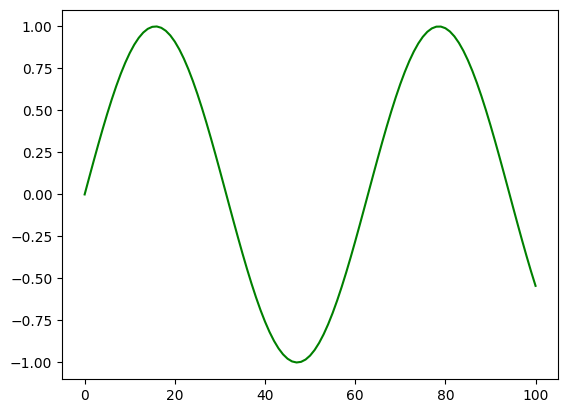

In [8]:
# First importing some important libraries
import numpy as np #NumPy is the fundamental package for scientific computing in Python
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

# Definition of an array
x=np.linspace(0,100,101)

# Calculation of a function
y=np.sin(x/10)

# Plotting the result
plt.plot(x, y, color="g", linestyle="-")

#Tasks:
#Debug the code
#Modify the variables
#Add another plot with a linear function
#Add a title to the ploit and name thes axes


Now we want to calculate something more relevant for structural engineering: The deflection of a simple beam under nodal loading in the center of the beam.

The deflection curve is given as:
$y(x) = \frac{F x (L^3 - 2L x^2 + x^3)}{48 E I L}$

(Please check)

My check with ChatGPT out of the code:
$-\frac{F \cdot x \cdot (L^3 - 2L \cdot x^2 + x^3)}{48 \cdot E \cdot I \cdot L}$

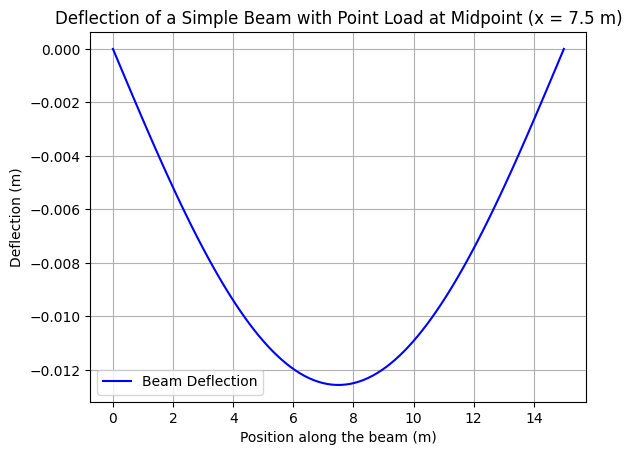

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def beam_deflection(x, L, F, E, I):
    """Calculate deflection y at position x for a simle beam with a midpoint load P."""
    return -F*x*(L**3-2*L*x**2+x**3)/(48*E*I*L)

# Parameters
L = 15.0        # Length of the beam (m)
F = 1000.0      # Load applied at the midpoint (N)
E = 2.1e11      # Young's modulus (N/m^2)
I = 8.33e-6     # Moment of inertia (m^4)

# Generate deflection along the beam
x_values = np.linspace(0, L, 100)
y_values = [beam_deflection(x, L, F, E, I) for x in x_values]

# Plotting
plt.plot(x_values, y_values, label="Beam Deflection", color="blue")
plt.xlabel("Position along the beam (m)")
plt.ylabel("Deflection (m)")
plt.title("Deflection of a Simple Beam with Point Load at Midpoint (x = {:.1f} m)".format(L / 2))
plt.legend()
plt.grid(True)
plt.show()

#Tasks:
#Please check the equation for the deflection ;-)
#Rescale the results in the plot to mm
#Plot results for the deflection for an array of loading F=[10,20,50] in one plot
#Let's try ChatGPT support for coding.

Next Example: A cantilever beam with a random $F$ loading at the tip. The tip deflection for a static behaviour is computed as:

$y_{\text{tip}} = \frac{F L^3}{3 E I}$

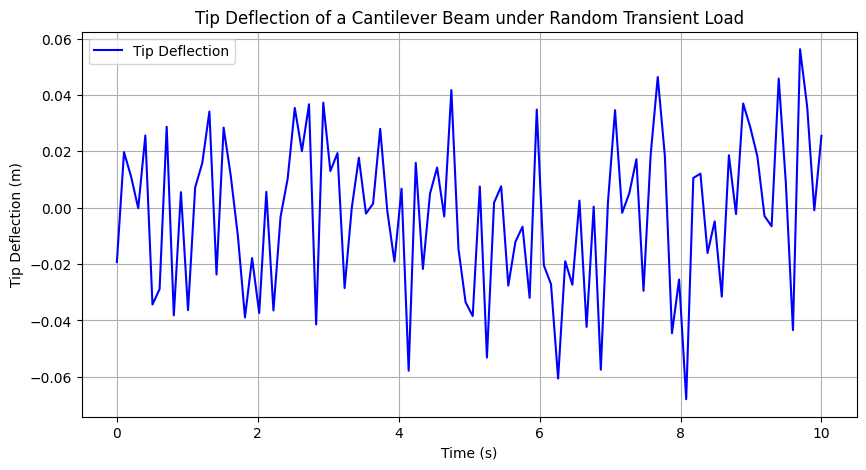

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Beam parameters
L = 5.0          # Length of the beam (m)
E = 210e9        # Young's modulus (Pa)
I = 8.33e-6      # Moment of inertia (m^4)

# Simulation parameters
time_steps = 100                 # Number of time steps
time = np.linspace(0, 10, time_steps)  # Time array from 0 to 10 seconds
random_force = np.random.normal(0, 1000, time_steps)  # Random load (N) with mean 0 and std dev 1000 N

# Calculate tip deflection over time
deflection_tip = (random_force * L**3) / (3 * E * I)

# Plotting the tip deflection over time
plt.figure(figsize=(10, 5))
plt.plot(time, deflection_tip, color="blue", label="Tip Deflection")
plt.xlabel("Time (s)")
plt.ylabel("Tip Deflection (m)")
plt.title("Tip Deflection of a Cantilever Beam under Random Transient Load")
plt.legend()
plt.grid(True)
plt.show()

#Tasks:
#Discuss the model accuracy given the fact, that a transient loading is induced and the response just considers stiffness.


For the dynamic response, the full equation of motion for a SDOF system is needed:

$m \ddot{y}_{\text{tip}} + c \dot{y}_{\text{tip}} + k y_{\text{tip}} = F(t)$

1.	Parameters: We define the beam properties, including effective mass  m , damping  c , and stiffness  k .
2.	Random Load: We generate a random load array, simulating transient forces over time.
3.	Euler’s Method for Solution:
- Acceleration Calculation: Using  $a = \frac{F - cv - ky}{m}$, we find the acceleration at each step.
- Velocity Update:  $v[i] = v[i-1] + a \cdot dt$.
- Displacement Update:  $y[i] = y[i-1] + v[i] \cdot dt$.
4.	Plotting: The tip deflection  $y_{\text{tip}}$  over time shows how the cantilever beam responds to random transient loading, considering inertia and damping effects.



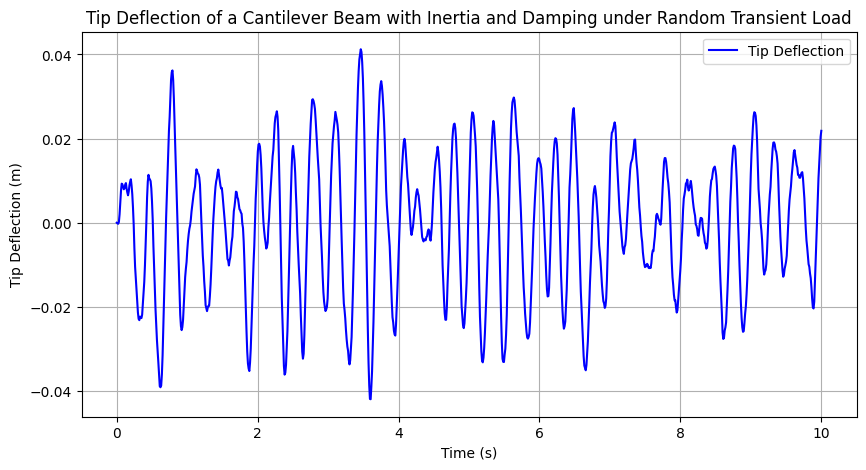

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Beam and system parameters
L = 5.0                  # Length of the beam (m)
E = 210e9                # Young's modulus (Pa)
I = 8.33e-6              # Moment of inertia (m^4)
m = 100.0                 # Effective mass at the beam tip (kg)
c = 500.0                # Damping coefficient (Ns/m)
k = 3 * E * I / L**3     # Stiffness (N/m)

# Simulation parameters
time_steps = 1000                 # Number of time steps
dt = 0.01                         # Time step (s)
time = np.linspace(0, dt*time_steps, time_steps)  # Time array
random_force = np.random.normal(0, 1000, time_steps)  # Random load (N)

# Initial conditions
y_tip = np.zeros(time_steps)      # Tip displacement
v_tip = np.zeros(time_steps)      # Tip velocity

# Time-stepping solution using Euler's method
for i in range(1, time_steps):
    # Compute acceleration at the current step
    acceleration = (random_force[i] - c * v_tip[i-1] - k * y_tip[i-1]) / m
    
    # Update velocity and displacement
    v_tip[i] = v_tip[i-1] + acceleration * dt
    y_tip[i] = y_tip[i-1] + v_tip[i] * dt

# Plotting the tip deflection over time
plt.figure(figsize=(10, 5))
plt.plot(time, y_tip, color="blue", label="Tip Deflection")
plt.xlabel("Time (s)")
plt.ylabel("Tip Deflection (m)")
plt.title("Tip Deflection of a Cantilever Beam with Inertia and Damping under Random Transient Load")
plt.legend()
plt.grid(True)
plt.show()

What are you goals to see here coded? 😀